In [1]:
import cPickle as pickle
import matplotlib.pylab as pl
%matplotlib inline

In [2]:
accuracy_table, progress_table = [], []
for N in range(1, 21):
    accuracy, progress = pickle.load(open('info/triple-state-normal-residual-network-%d' % N, 'rb'))
    accuracy_table.append(accuracy)
    progress_table.append(progress)
sorted_progress_table = sorted(progress_table, key=lambda progress : accuracy_table[progress_table.index(progress)])

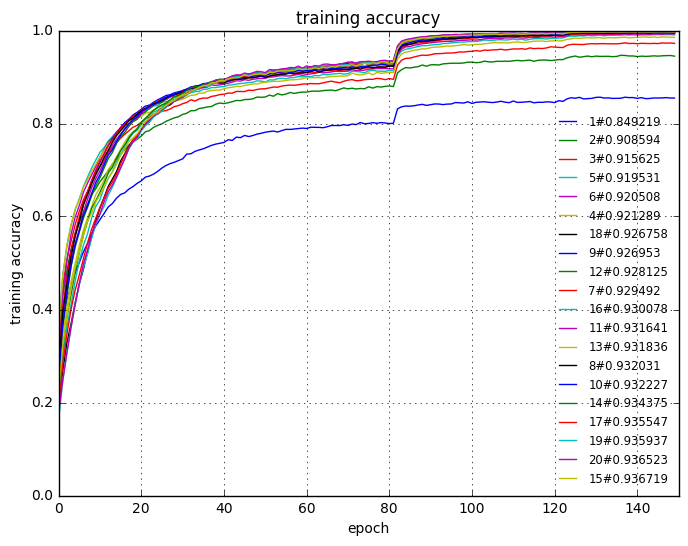

In [3]:
pl.figure(figsize=(8, 6))
for progress in sorted_progress_table:
    training_history = progress['training_accuracy']
    index = progress_table.index(progress)
    test_accuracy = accuracy_table[index]
    pl.plot(range(len(training_history)), training_history, label='%d#%f' % (index + 1, test_accuracy))
pl.legend(fontsize='small', framealpha=0, loc='best')
pl.title('training accuracy')
pl.xlabel('epoch')
pl.ylabel('training accuracy')
pl.xlim(0, 150)
pl.ylim(0, 1)
pl.grid()

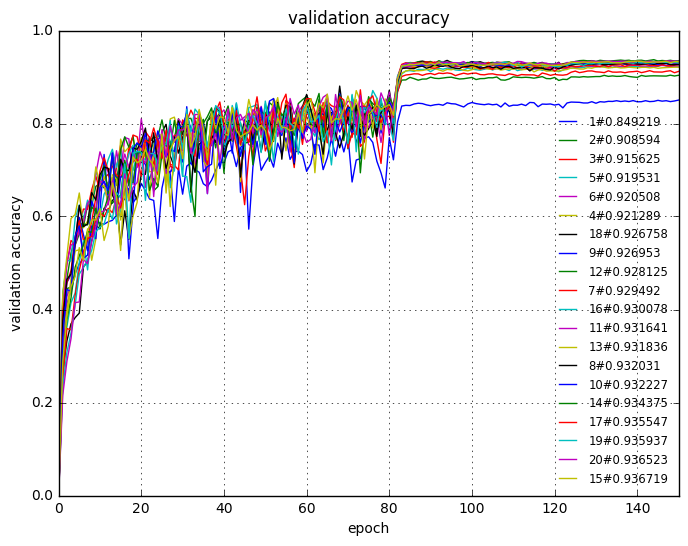

In [4]:
pl.figure(figsize=(8, 6))
for progress in sorted_progress_table:
    validation_history = progress['validation_accuracy']
    index = progress_table.index(progress)
    test_accuracy = accuracy_table[index]
    pl.plot(range(len(validation_history)), validation_history, label='%d#%f' % (index + 1, test_accuracy))
pl.legend(fontsize='small', framealpha=0, loc='best')
pl.title('validation accuracy')
pl.xlabel('epoch')
pl.ylabel('validation accuracy')
pl.xlim(0, 150)
pl.ylim(0, 1)
pl.grid()